<a href="https://colab.research.google.com/github/SambhavRekhawat/test/blob/main/Cox_Ingersoll_Ross.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## CIR MODEL

The CIR (1985) model is a yield-based one-factor equilibrium model that assumes that the interest rate is normally distributed. The model incorporates mean reversion and is popular in the academic community — mainly due to its analytic tractability.

The model is used much by actuaries in the U.S. to model the evaluation of interest rate in order to price life insurance contracts.

The model specifies that the instantaneous interest rate follows the stochastic differential equation where, dz is a Wiener process modeling the random market risk factor, (σ√r) determines the volatility of the interest rate, a is the speed of the mean reversion, and b is the mean reversion level.

Monte Carlo method is a numerical method that is useful in many situations when no closed-form solution is available. The Monte Carlo method can be used to simulate a wide range of stochastic processes and is thus very general.

To illustrate the use of Monte Carlo simulation, we used the CIR model as a stochastic process for which the underlying interest rate follows. Here, dz is a Wiener process with standard deviation 1 and mean 0. To simulate the process, we consider its values at given discrete time intervals, Δt apart:


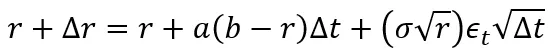

where Δr is the change in r in the chosen time interval Δt, and ϵt is a random drawing from a standard normal distribution.

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from numpy import random as rn
%matplotlib inline

a = -0.194488612925313
b = 0.000358381265440957
σ = 0.022415895086062

In [ ]:
r0 = 0.0375
T = 1
N = 12
δt = T/N
δt
M = int(5*1e4)
M
dz = rn.randn(M,N)
r = r0*np.ones((M,N+1))
for i in range(0,N):
    r[:,i+1] = r[:,i] + a*(b-r[:,i])*δt + σ*np.sqrt(r[:,i])*dz[:,i]*np.sqrt(δt)

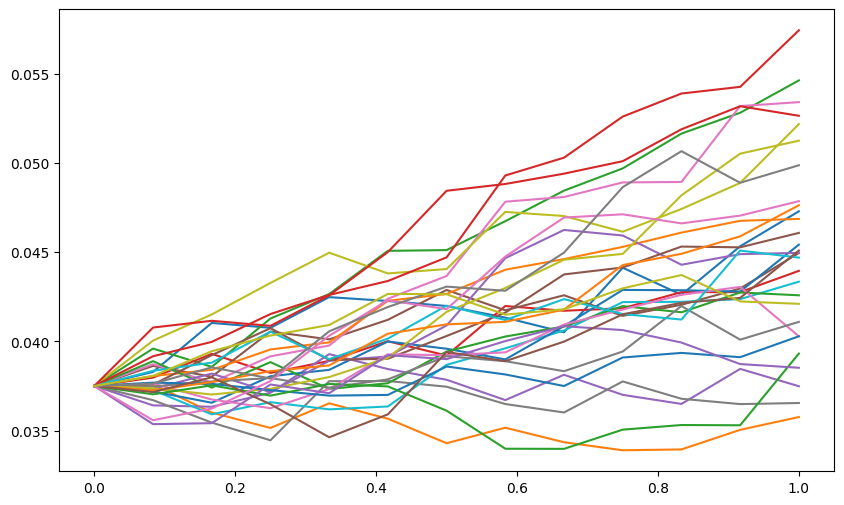

In [9]:
plt.figure(figsize=(10,6))

a = [ rn.randint(0,M) for j in range(1,30)]

for runer in a:
    plt.plot(np.arange(0,T+δt,δt),r[runer])

In [ ]:
V = (r[:,-1])
print("The expected value for the interest rate is:","{:.3%}".format(np.mean(V)))
print("The standard error of sample mean is:", "{:.4%}".format(np.std(V)/np.sqrt(M)))

The expected value for the interest rate is: 4.539%
The standard error of sample mean is: 0.0022%
